- Text to numbers converstion in two ways:
    - Integer Encoding : sparse matrix ka use hota hai(most of the values are zero)
    - Embedding : dense matrix ka use hota hai(koi bhi value zero nhi hoti hai isme)
        - ye word ki meaning ko samagh pata hai ki kis context me baat ho rhi jbki Integer Encoding me esa nhi hota hai.
        - aur ye less no. of matrix banata hai.
- Padding : sabhi vectors(1-D list) ko same size me lana.

- Sparse Matrix: Ideal for traditional NLP methods like TF-IDF, BoW, and any scenario where the feature space is large and mostly empty.
- Dense Matrix: Best for applications requiring semantic understanding and context, such as neural networks and word embeddings.
- __Summary__
    - The choice between sparse and dense matrices depends on the specific requirements of your text processing task. Sparse matrices are efficient for traditional NLP techniques dealing with large, sparse data, while dense matrices are crucial for deep learning applications and when capturing semantic relationships between words. Understanding these differences helps in optimizing the performance and efficiency of machine learning models.

In [1]:
import numpy as np 

docs = [
    'go india',
    'india india',
    'hip hip hurray',
    'jeetega bhai jeetega india jeetega',
    'bharat mata ki jai',
    'kohli kohli',
    'sachin sachin',
    'dhoni dhoni',
    'modi ji ki jai',
    'inquilab zindabad'
]
docs

['go india',
 'india india',
 'hip hip hurray',
 'jeetega bhai jeetega india jeetega',
 'bharat mata ki jai',
 'kohli kohli',
 'sachin sachin',
 'dhoni dhoni',
 'modi ji ki jai',
 'inquilab zindabad']

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer 

tokenizer = Tokenizer(oov_token='<nothing>') # iska means ye hai ki agar koi word ese aata hai jo aapke docs 
                                       # me nhi hai to ye use  nothing se replece kr dega.
tokenizer.fit_on_texts(docs)

In [4]:
tokenizer.word_index 

{'<nothing>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [5]:
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [7]:
tokenizer.document_count

10

In [73]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

In [74]:
type(sequences),len(sequences)

(list, 10)

In [75]:
from tensorflow.keras.utils import pad_sequences 

padded_sequences = pad_sequences(sequences,padding='post')
# padded_sequences = pad_sequences(sequences,padding='pre')
padded_sequences

array([[10,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 11,  0,  0],
       [ 3, 12,  3,  2,  3],
       [13, 14,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]], dtype=int32)

In [76]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten,SimpleRNN,Embedding
from tensorflow.keras.datasets import imdb 

(X_train,y_train),(X_test,y_test) = imdb.load_data()

In [77]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [78]:
X_train.shape

(25000,)

In [79]:
X_test.shape

(25000,)

In [80]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [81]:
type(X_train)

numpy.ndarray

In [82]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [83]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)# maxlen 50 sabhi sentence ko trim kr de rha hai
X_test = pad_sequences(X_test,padding='post',maxlen=50) 


In [84]:
X_train

array([[ 2071,    56,    26, ...,    19,   178,    32],
       [ 8255,     5, 25249, ...,    16,   145,    95],
       [  215,    28,   610, ...,     7,   129,   113],
       ...,
       [    4,    65,   496, ...,     4,  3586, 22459],
       [   13,    18,    31, ...,    12,     9,    23],
       [ 7585,     8,  2197, ...,   204,   131,     9]], dtype=int32)

In [85]:
X_train.shape # har ek sentence me 50 words hai ab after providing maxlen parameter 

(25000, 50)

In [116]:
X_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32], dtype=int32)

In [118]:
X_train[0].shape

(50,)

In [86]:
len(X_train[0])

50

- If you're processing a sentence of 10 words, **each word** would be considered a **time-step** in the RNN.

In [120]:
model = Sequential() 
model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


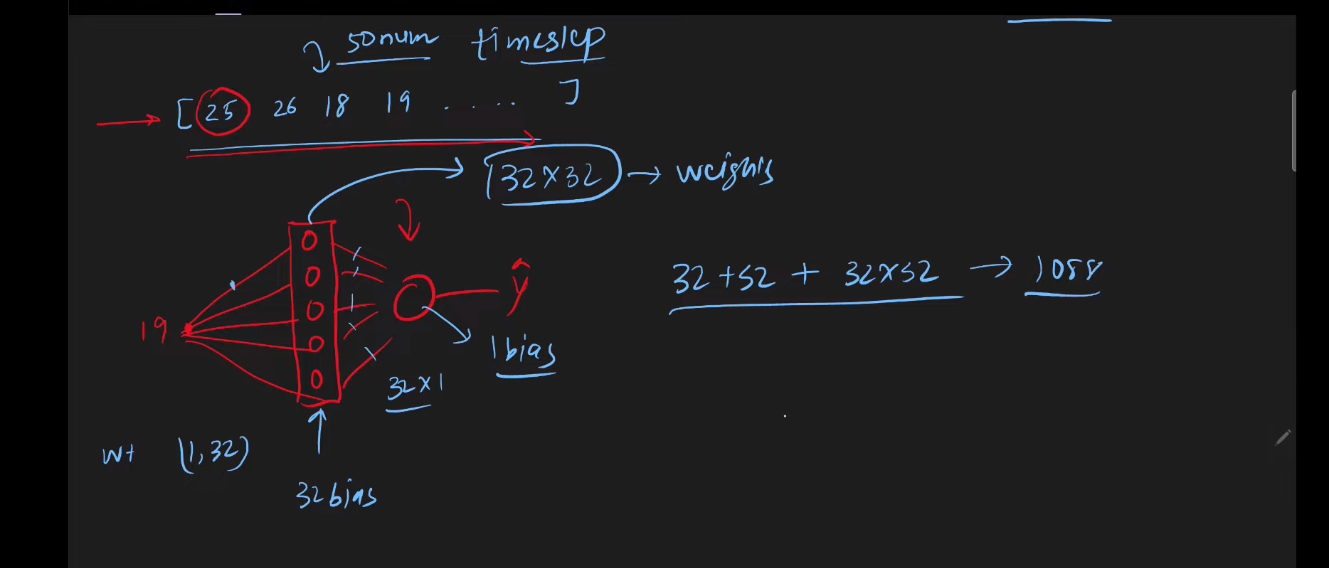

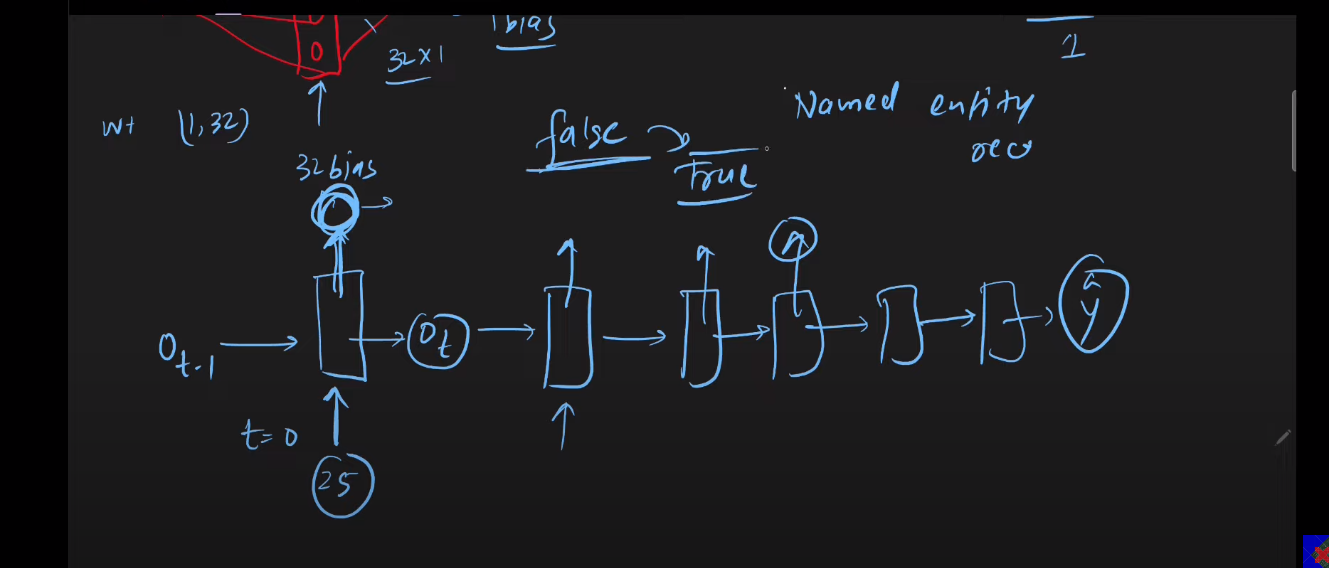

In [88]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 [==============================] - 7s 7ms/step - loss: 0.6940 - accuracy: 0.5048 - val_loss: 0.6948 - val_accuracy: 0.4972
Epoch 2/5
782/782 [==============================] - 6s 7ms/step - loss: 0.6928 - accuracy: 0.5090 - val_loss: 0.6968 - val_accuracy: 0.5010
Epoch 3/5
782/782 [==============================] - 5s 7ms/step - loss: 0.6932 - accuracy: 0.5074 - val_loss: 0.6941 - val_accuracy: 0.5015
Epoch 4/5
782/782 [==============================] - 5s 7ms/step - loss: 0.6928 - accuracy: 0.5052 - val_loss: 0.6960 - val_accuracy: 0.5042
Epoch 5/5
782/782 [==============================] - 6s 7ms/step - loss: 0.6931 - accuracy: 0.5030 - val_loss: 0.6947 - val_accuracy: 0.5032


#--------------------2-Word Embedding------------------

- Techniques of word Embedding :
    - 1.word2vec :--> ML
    - 2.glove :--> ML
    - 3.embedding layer :--> DL(tensorflow me keras ke under ek layer aati hai) 

In [8]:
docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [9]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [10]:
tokenizer.fit_on_texts(docs)

In [11]:
len(tokenizer.word_index)

17

In [101]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[9, 1],
 [1, 1],
 [3, 3, 10],
 [2, 11, 2, 1, 2],
 [12, 13, 4, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [14, 15, 4, 5],
 [16, 17]]

In [102]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[ 9,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3, 10,  0,  0],
       [ 2, 11,  2,  1,  2],
       [12, 13,  4,  5,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [14, 15,  4,  5,  0],
       [16, 17,  0,  0,  0]], dtype=int32)

Embedding Layer Arguments
input_dim (17):

This is the size of the vocabulary. In other words, it specifies the number of distinct input values the model will expect. For instance, if your input data can take 17 different values (like unique words or tokens), you would set input_dim to 17.
output_dim (2):

This is the size of the dense embedding vectors that each word index will be mapped to. In this case, each of the 17 unique input values will be represented as a 2-dimensional vector. The embedding layer will learn the weights of these vectors during training.
input_length (5):

This is the length of the input sequences. If each input sequence to the model has 5 elements, you specify input_length as 5. This means each input sample will be a sequence of 5 integers, where each integer is an index in the range of [0, input_dim-1]

In [103]:
model = Sequential()
# 17 : unique words in the documents 
# output_dim = 2 : sequence/vectors/ a no. in the sequence ko two nos. me represent krega
# input_length=5 : ki apke document ke har ek sequence me kitna element hai.
model.add(Embedding(17,output_dim=2,input_length=5))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 5, 2)              34        
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile('adam','accuracy')

In [105]:
pred = model.predict(sequences) # something is wrong R & D on it.
print(pred) # 

2024-04-09 12:38:50.952159: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: indices[9,1] = 17 is not in [0, 17)
	 [[{{node sequential_10/embedding_6/embedding_lookup}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_10/embedding_6/embedding_lookup' defined at (most recent call last):
    File "/home/echelon/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/echelon/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/echelon/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/echelon/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/echelon/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_719699/2269839758.py", line 1, in <module>
      pred = model.predict(sequences)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2111, in predict_step
      return self(x, training=False)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/echelon/anaconda3/lib/python3.9/site-packages/keras/layers/core/embedding.py", line 272, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_10/embedding_6/embedding_lookup'
indices[9,1] = 17 is not in [0, 17)
	 [[{{node sequential_10/embedding_6/embedding_lookup}}]] [Op:__inference_predict_function_67874]

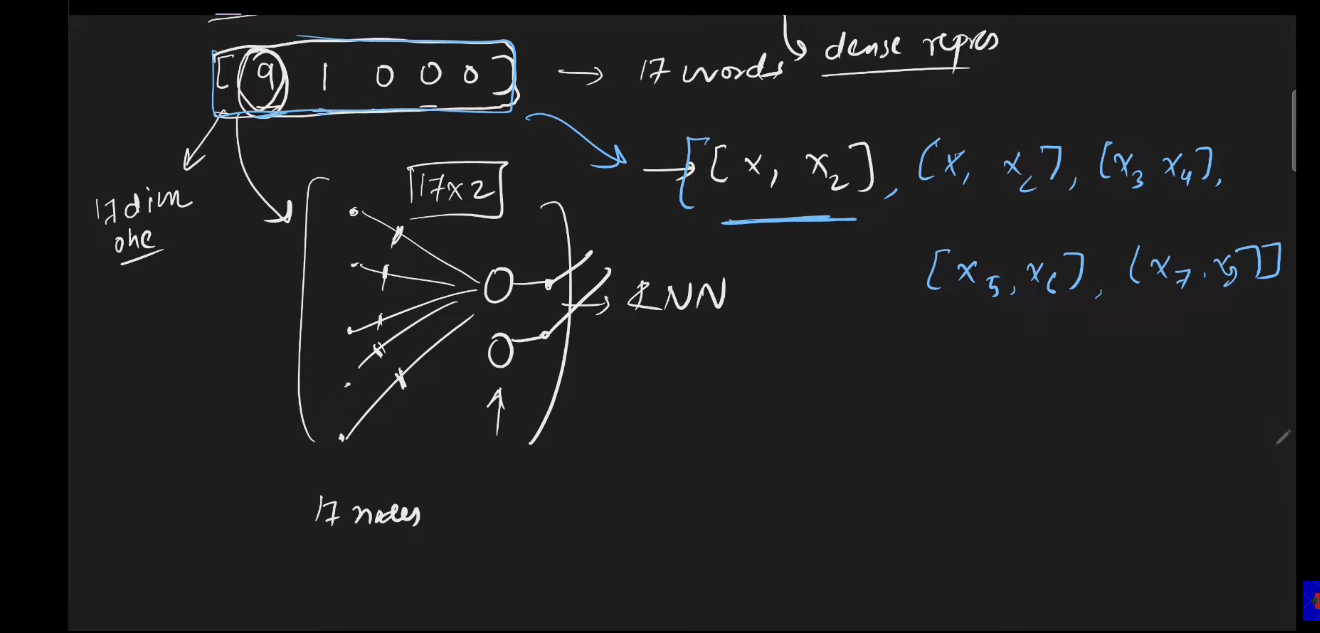

https://colab.research.google.com/drive/1FLJZ0LeMiW_6OkzFrC-o035YZPBFEFR4?usp=sharing#scrollTo=yrM0IXVamPLn

from pyrca.analyzers.bayesian import BayesianNetwork